In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%config InlineBackend.figure_format = 'retina'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
import time
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

sns.set(rc={'figure.figsize':(20,14)})

In [ ]:
# Append columns to the dataset and add ‘target’ column.
cols ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')

# Create dictionary of training_attack_types

attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [ ]:
# Read in the full KDD 1999 dataset (10% subset also available)
path = "/content/kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns)

In [ ]:
df['Attack_Type'] = df['target']
df['target'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,normal.


In [ ]:
# df.label.value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
df.shape

(494021, 43)

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Finding categorical features
numerical_cols = df._get_numeric_data().columns
categorical_cols = list(set(df.columns)-set(numerical_cols))
categorical_cols.remove('target')
# categorical_cols.remove('Attack_Type')
categorical_cols

['protocol_type', 'service', 'Attack_Type', 'flag']

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
    plt.xlabel(feature)
    plt.ylabel('Count')

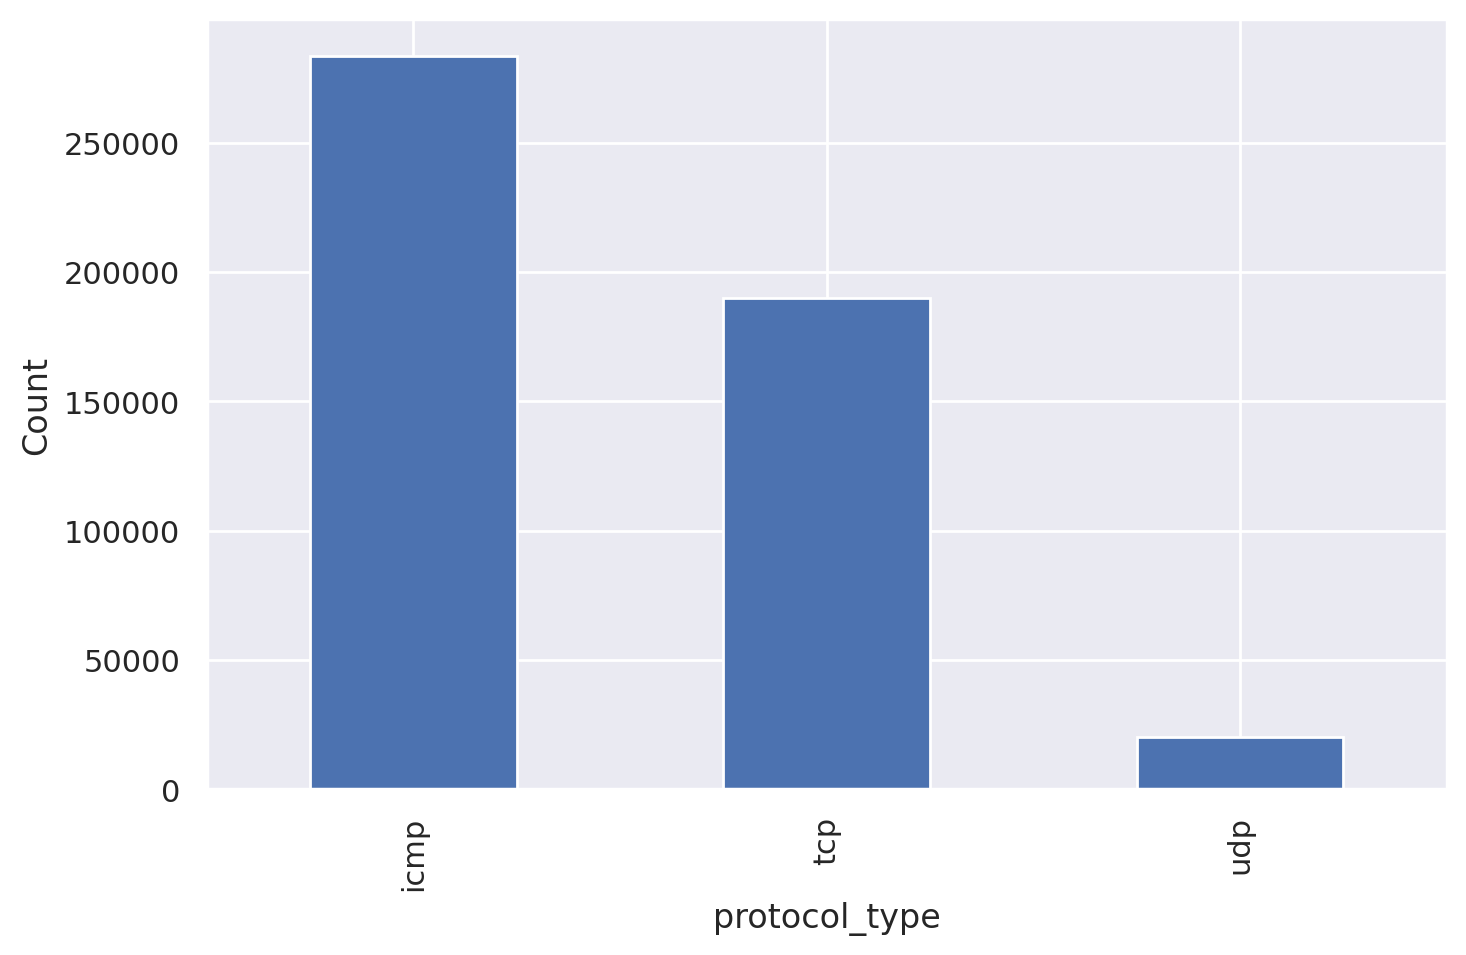

In [ ]:
plt.figure(figsize=(8,5))
bar_graph('protocol_type')

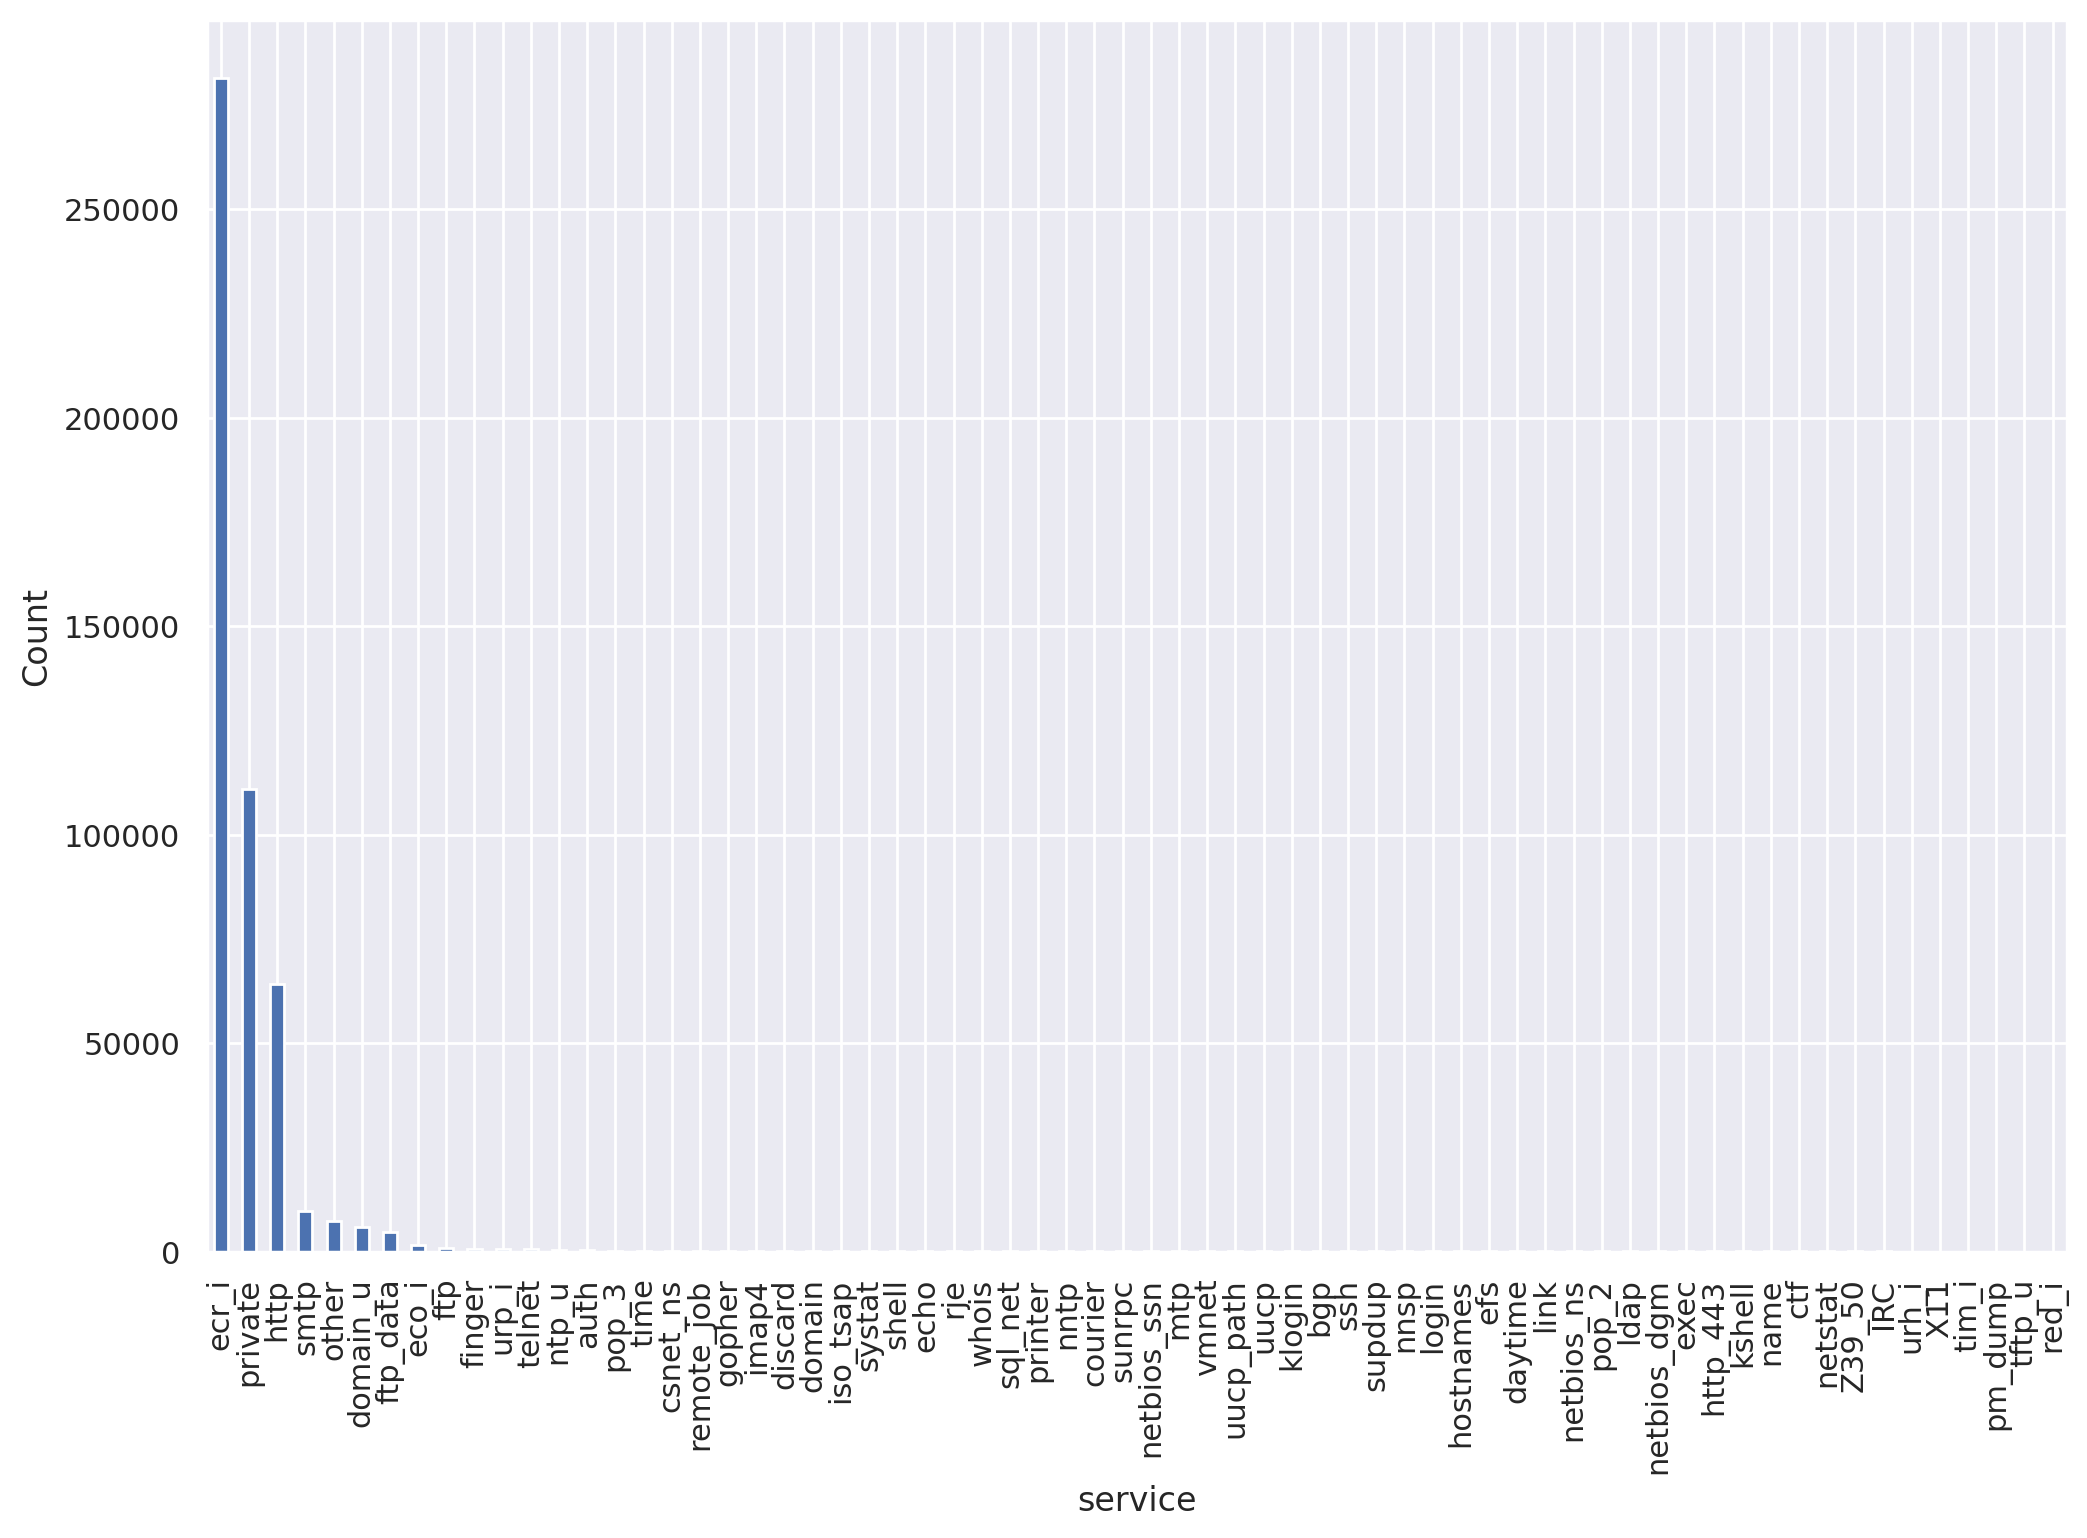

In [ ]:
plt.figure(figsize=(12,8))
bar_graph('service')

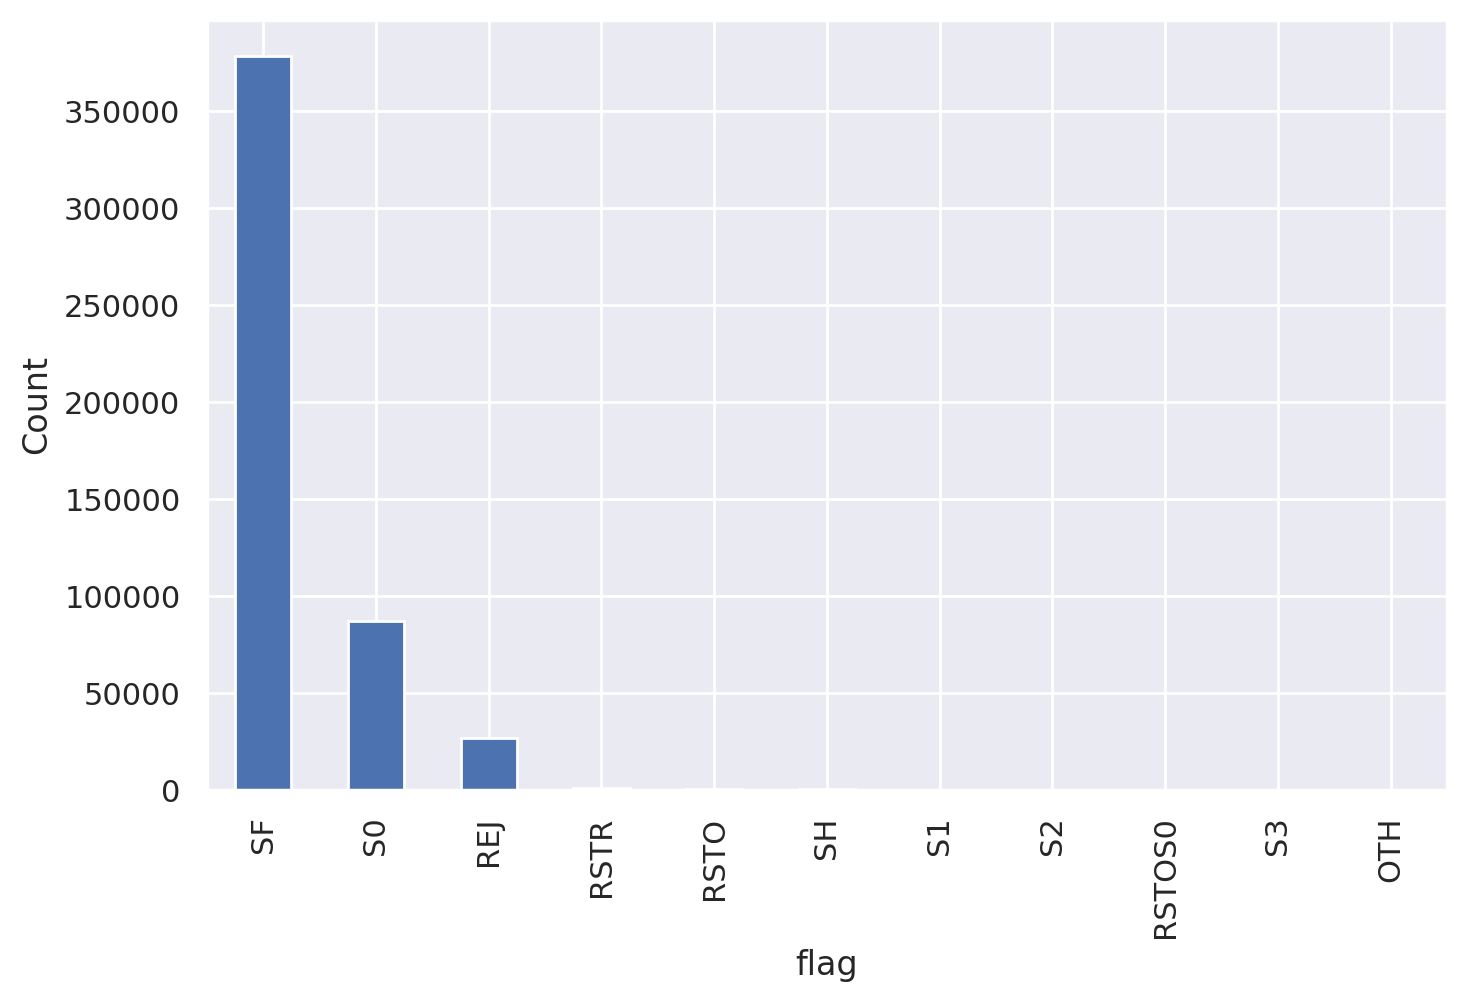

In [ ]:
plt.figure(figsize=(8,5))
bar_graph('flag')

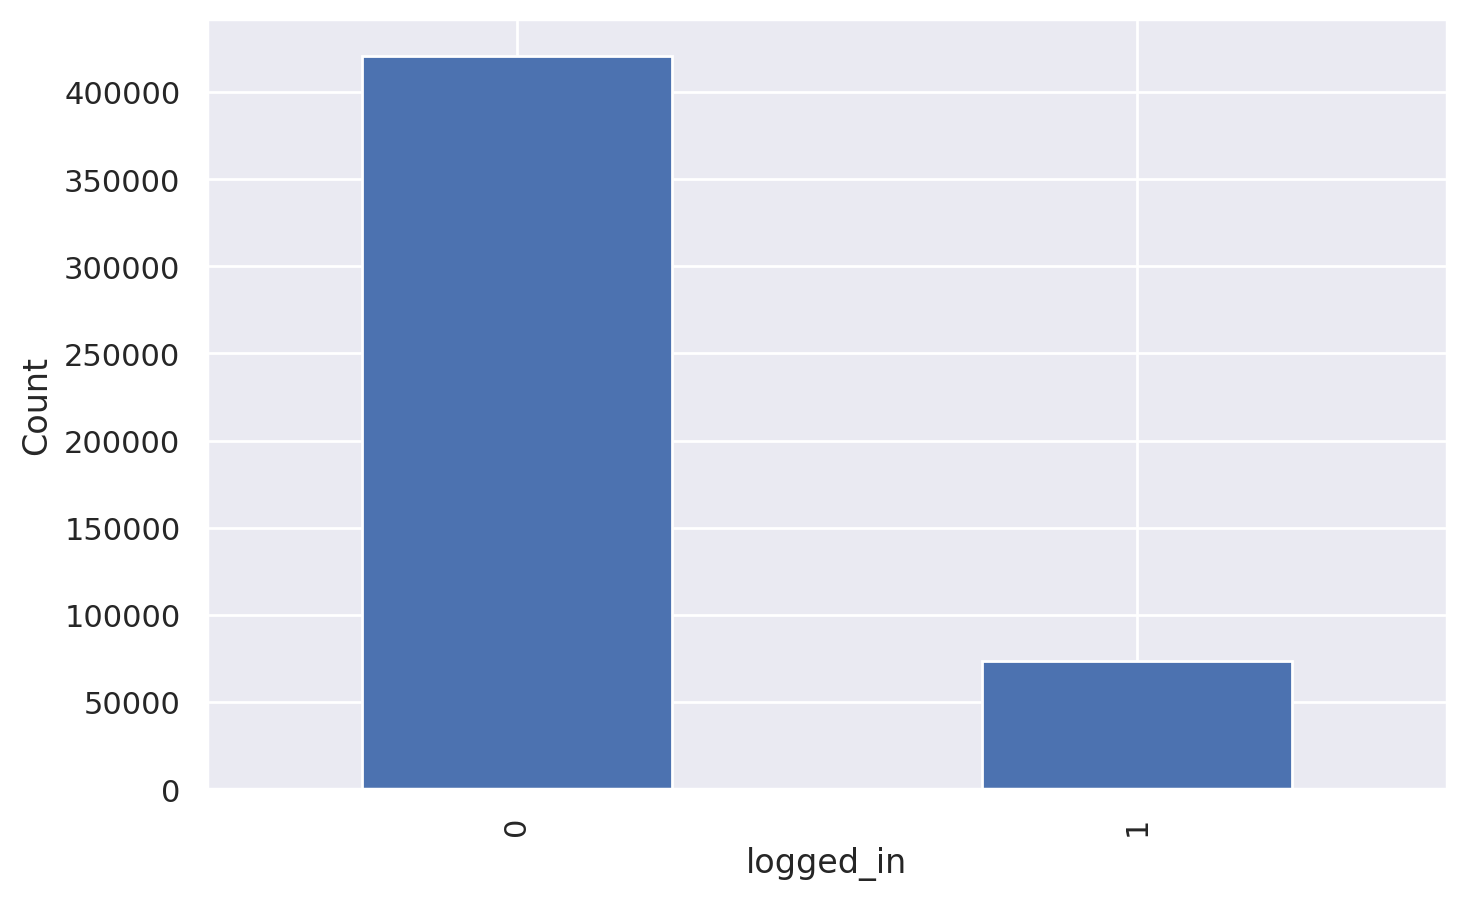

In [ ]:
plt.figure(figsize=(8,5))
bar_graph('logged_in')

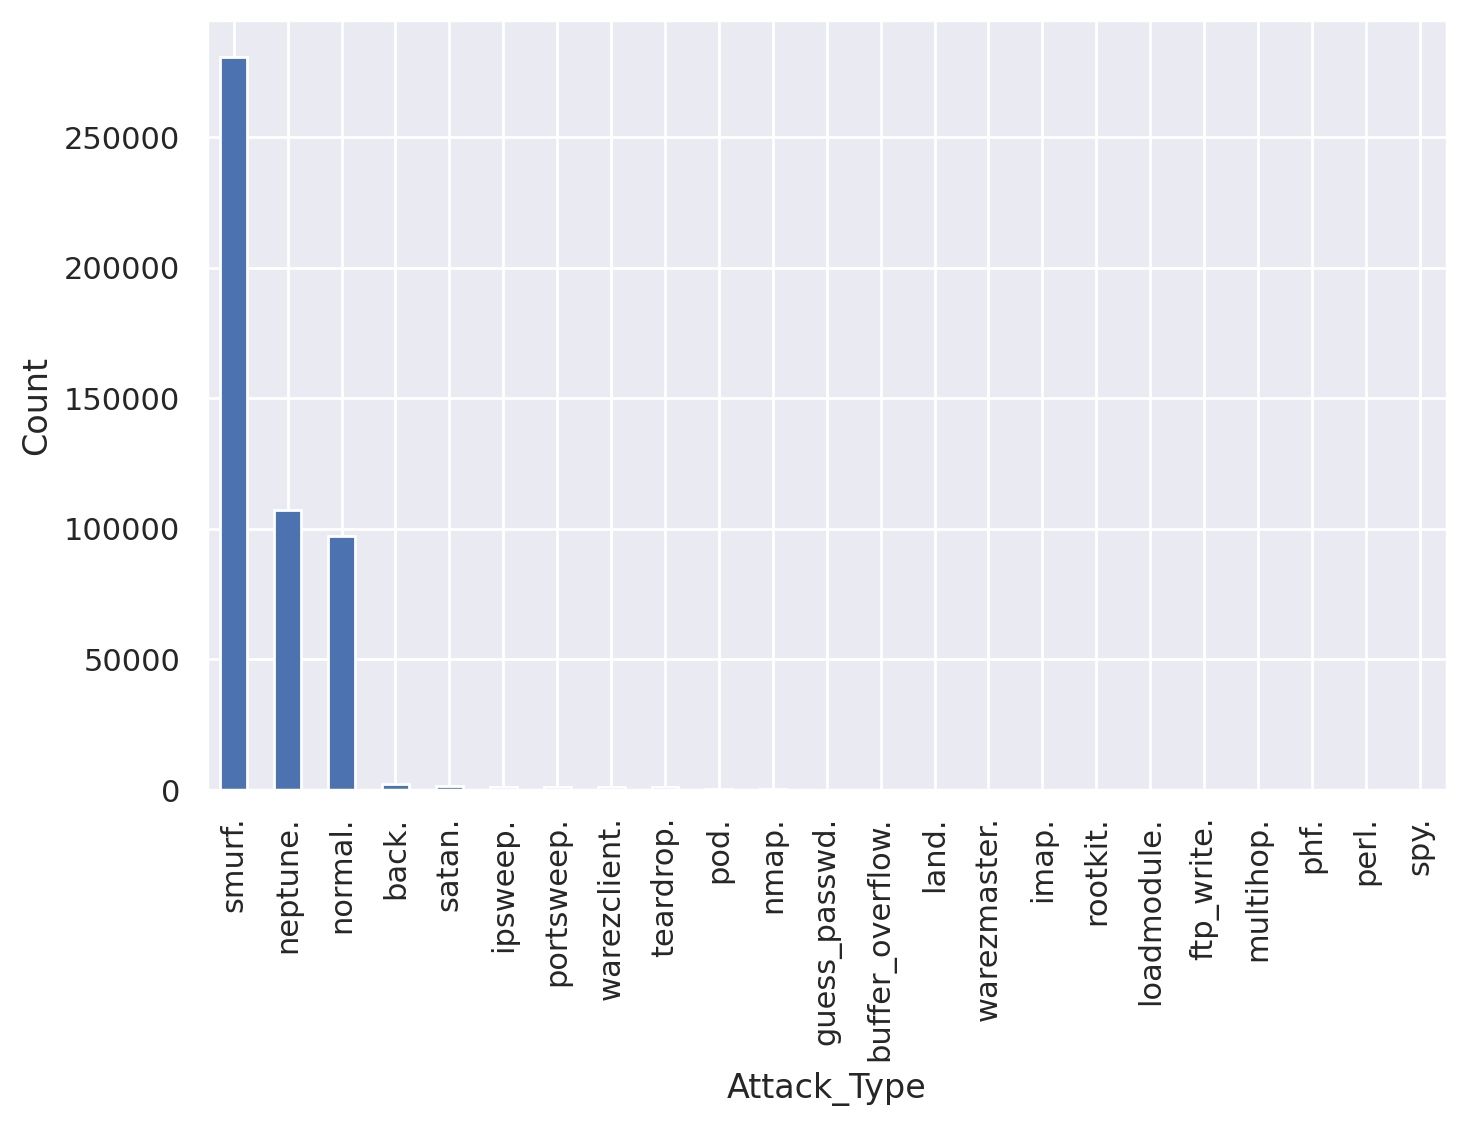

In [ ]:
plt.figure(figsize=(8,5))
bar_graph('Attack_Type')

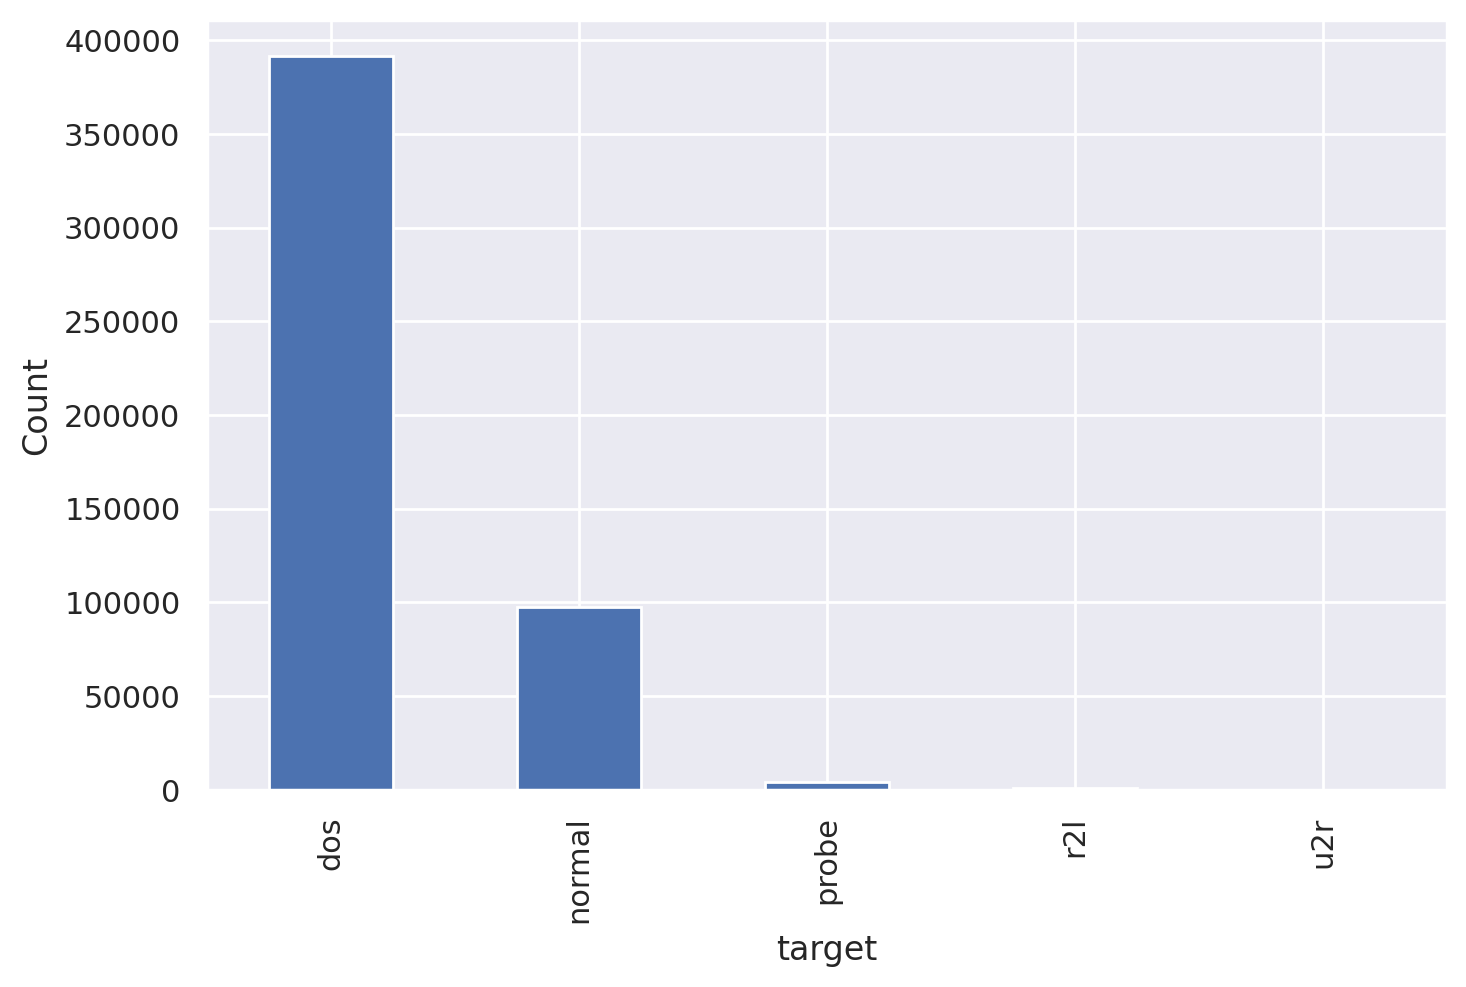

In [ ]:
plt.figure(figsize=(8,5))
bar_graph('target')

<ipython-input-17-37be554fc9e3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # Drop columns with NaN


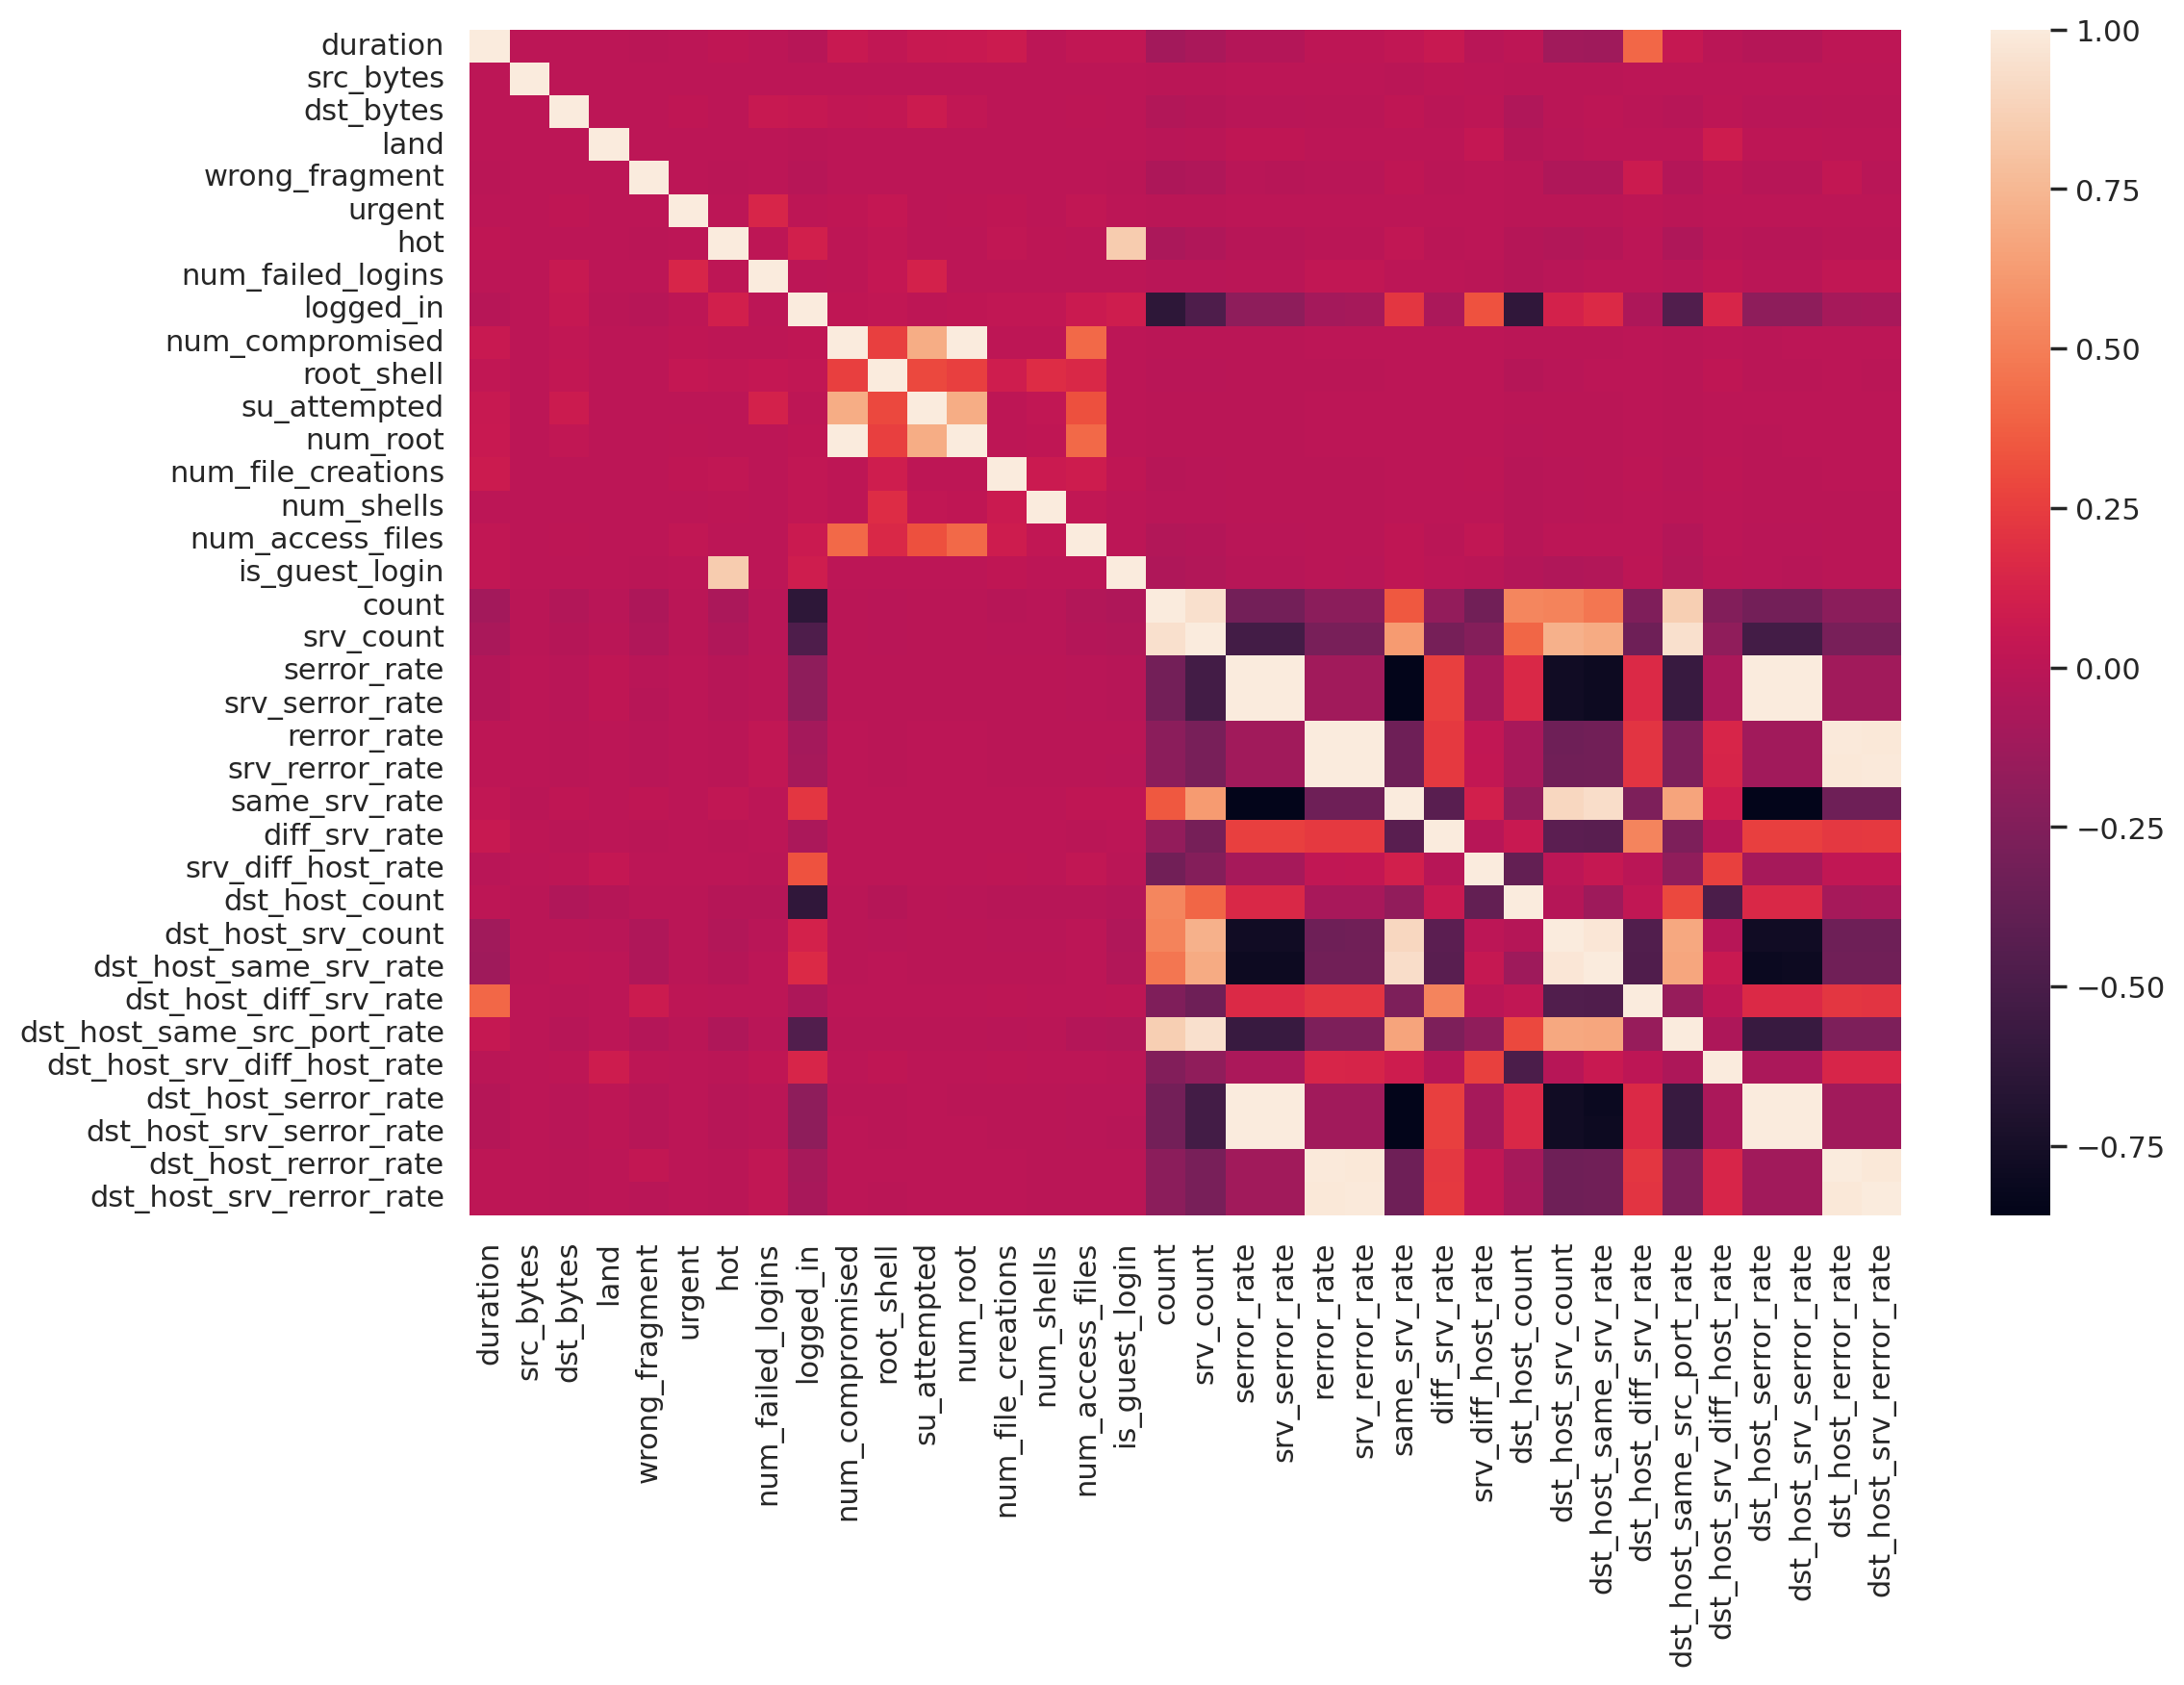

In [ ]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

df = df.dropna('columns') # Drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]] # Keep columns where there are more than 1 unique values
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr)
plt.show()

In [ ]:
# Drop highly correlated variables as these should be ignored for learning
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

# Drop 'service' since provides no useful information for learning
df.drop('service',axis = 1, inplace=True)
df.drop('Attack_Type',axis = 1, inplace=True)

In [ ]:
df.target.value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: target, dtype: int64

In [ ]:
# Feature Mapping
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  int64  
 2   flag                         494021 non-null  int64  
 3   src_bytes                    494021 non-null  int64  
 4   dst_bytes                    494021 non-null  int64  
 5   land                         494021 non-null  int64  
 6   wrong_fragment               494021 non-null  int64  
 7   urgent                       494021 non-null  int64  
 8   hot                          494021 non-null  int64  
 9   num_failed_logins            494021 non-null  int64  
 10  logged_in                    494021 non-null  int64  
 11  num_compromised              494021 non-null  int64  
 12  root_shell                   494021 non-null  int64  
 13 

In [ ]:
# create a dictionary to map the attack types to the categories
attack_type_to_category = {'normal': 'normal',
                           'dos': 'abnormal',
                           'probe': 'abnormal',
                           'r2l': 'abnormal',
                           'u2r': 'abnormal'}

# map the attack types to the categories and create a new 'Category' column
df['target'] = df['target'].map(attack_type_to_category)
df.target.value_counts()

abnormal    396743
normal       97278
Name: target, dtype: int64

In [ ]:
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns

# using standard scaler for normalizing
std_scaler = StandardScaler()

def standardization(df, col):
    df[col] = std_scaler.fit_transform(df[col])
    return df

# calling the normalization() function
df[numeric_col] = standardization(df, numeric_col)[numeric_col]

In [ ]:
print(df.shape)
df.target=df.target.apply(lambda x: 0 if x == 'normal' else 1)
# Split between target variable and train set
y = df[['target']]
X = df.drop(['target', ], axis = 1)
# X = df.drop(['label', ], axis=1)

min_max_sc = MinMaxScaler() # Transform features by scaling each feature (ranfge = (0,1))
X = min_max_sc.fit_transform(X)

# Split dataset between training and testing set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

models=[]
train_score=[]
test_score=[]

(494021, 32)
(395216, 31) (98805, 31)
(395216, 1) (98805, 1)


In [ ]:
def train_and_test(model):
    print(model)
    models.append(model)
    # Training the model
    model.fit(X_train, y_train.values.ravel())

    # Testing the model
    y_test_pred = model.predict(X_train)

    # Model test and train scores
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_score.append(train_acc)
    test_score.append(test_acc)

    print("Train score is:", train_acc)
    print("Test score is:", test_acc)

In [ ]:
# Create models
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
rfst = RandomForestClassifier(n_estimators = 30)
svc = SVC(gamma = 'scale')
lr = LogisticRegression(max_iter = 1200000)
gbc = GradientBoostingClassifier(random_state = 0)
lgbm = lgb.LGBMClassifier()

# Train and test the models
train_and_test(gnb)
train_and_test(dtc)
train_and_test(rfst)
train_and_test(svc)
train_and_test(lr)
train_and_test(gbc)
train_and_test(lgbm)

GaussianNB()
Train score is: 0.9845451601149751
Test score is: 0.9840392692677497
DecisionTreeClassifier(criterion='entropy', max_depth=4)
Train score is: 0.9919056920772439
Test score is: 0.9918728809270786
RandomForestClassifier(n_estimators=30)
Train score is: 0.9999797579045383
Test score is: 0.9996558878599261
SVC()
Train score is: 0.9987930650580948
Test score is: 0.9986842771114822
LogisticRegression(max_iter=1200000)
Train score is: 0.9925458483462208
Test score is: 0.9924902585901523
GradientBoostingClassifier(random_state=0)
Train score is: 0.9989803044411157
Test score is: 0.9987247608926674
LGBMClassifier()
Train score is: 0.9999974697380672
Test score is: 0.9997975810940742


In [ ]:
clf = CatBoostClassifier(iterations=50, random_seed=42, learning_rate=0.5, custom_loss=['AUC', 'Accuracy'])
models.append('clf')

clf.fit(X_train, y_train, plot=True)
y_test_pred = clf.predict(X_train)

print("Train score is:", clf.score(X_train, y_train))
print("Test score is:", clf.score(X_test, y_test))
train_score.append(clf.score(X_train, y_train))
test_score.append(clf.score(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0457082	total: 179ms	remaining: 8.79s
1:	learn: 0.0218272	total: 293ms	remaining: 7.03s
2:	learn: 0.0105479	total: 414ms	remaining: 6.48s
3:	learn: 0.0076144	total: 544ms	remaining: 6.25s
4:	learn: 0.0058523	total: 694ms	remaining: 6.25s
5:	learn: 0.0048864	total: 804ms	remaining: 5.9s
6:	learn: 0.0041653	total: 923ms	remaining: 5.67s
7:	learn: 0.0035642	total: 1.04s	remaining: 5.48s
8:	learn: 0.0027716	total: 1.17s	remaining: 5.34s
9:	learn: 0.0021297	total: 1.29s	remaining: 5.15s
10:	learn: 0.0019669	total: 1.4s	remaining: 4.95s
11:	learn: 0.0019668	total: 1.48s	remaining: 4.68s
12:	learn: 0.0018344	total: 1.61s	remaining: 4.59s
13:	learn: 0.0018338	total: 1.71s	remaining: 4.4s
14:	learn: 0.0018338	total: 1.8s	remaining: 4.2s
15:	learn: 0.0017148	total: 1.92s	remaining: 4.08s
16:	learn: 0.0015130	total: 2.04s	remaining: 3.96s
17:	learn: 0.0015130	total: 2.13s	remaining: 3.79s
18:	learn: 0.0013703	total: 2.28s	remaining: 3.71s
19:	learn: 0.0013033	total: 2.4s	remaining: 3.

In [ ]:
def create_shallow_model():
    model = Sequential([
        Dense(1024, input_dim=31, activation='relu'),
        Dropout(0.01),
        Dense(5, activation='softmax')
    ])
    model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
def create_deep_model():
    model = Sequential([
        Dense(1024, input_dim=31, activation='relu'),
        Dropout(0.01),
        Dense(768, activation='relu'),
        Dropout(0.01),
        Dense(512, activation='relu'),
        Dropout(0.01),
        Dense(256, activation='relu'),
        Dropout(0.01),
        Dense(128, activation='relu'),
        Dropout(0.01),
        Dense(5, activation='softmax')
    ])
    model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
def create_cnn_model():
    model = Sequential([
        Conv1D(64, 3, padding="same", activation="relu", input_shape=(31,1)),
        MaxPooling1D(pool_size=(2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(5, activation="softmax")
    ])
    model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
shallow_model = create_shallow_model()
shallow_model.fit(X_train, y_train, epochs=10, batch_size=32)
models.append('snn')

deep_model = create_deep_model()
deep_model.fit(X_train, y_train.values.ravel(), epochs=10, batch_size=32)
models.append('dnn')

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((-1,31,1)), y_train.values.ravel(), epochs=10, batch_size=32)
models.append('cnn')

shallow_preds_train = shallow_model.predict(X_train)
shallow_test = shallow_model.predict(X_test)
deep_preds_train = deep_model.predict(X_train)
deep_test = deep_model.predict(X_test)
cnn_preds_train = cnn_model.predict(X_train.reshape((-1,31,1)))
cnn_test = cnn_model.predict(X_test.reshape((-1,31,1)))

Epoch 1/10
12351/12351 [==============================] - 60s 5ms/step - loss: 0.0099 - accuracy: 0.9971
Epoch 2/10
12351/12351 [==============================] - 64s 5ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 3/10
12351/12351 [==============================] - 61s 5ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 4/10
12351/12351 [==============================] - 59s 5ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 5/10
12351/12351 [==============================] - 59s 5ms/step - loss: 0.0031 - accuracy: 0.9991
Epoch 6/10
12351/12351 [==============================] - 58s 5ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 7/10
12351/12351 [==============================] - 61s 5ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 8/10
12351/12351 [==============================] - 62s 5ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 9/10
12351/12351 [==============================] - 63s 5ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 10/10
12351/12351 [==============================

In [ ]:
def print_model_results(model_name, Y_train, Y_test, preds_train, preds_test):
    print(model_name)
    print("Training Accuracy:", accuracy_score(Y_train, np.argmax(preds_train, axis=1)))
    print("Testing Accuracy:", accuracy_score(Y_test, np.argmax(preds_test, axis=1)))

print_model_results("SHALLOW NEURAL NETWORK", y_train, y_test, shallow_preds_train, shallow_test)
print_model_results("DEEP NEURAL NETWORK", y_train, y_test, deep_preds_train, deep_test)
print_model_results("CONVOLUTIONAL NEURAL NETWORK", y_train, y_test, cnn_preds_train, cnn_test)

SHALLOW NEURAL NETWORK
Training Accuracy: 0.9992257398485891
Testing Accuracy: 0.9989069379080006
DEEP NEURAL NETWORK
Training Accuracy: 0.999342131897494
Testing Accuracy: 0.9990891149233339
CONVOLUTIONAL NEURAL NETWORK
Training Accuracy: 0.9990916359661552
Testing Accuracy: 0.9988360912909265


AttributeError: ignored

In [ ]:
loss, accuracy = shallow_model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = shallow_model.evaluate(X_train, y_train, verbose=1)
train_score.append(accuracy_v)
test_score.append(accuracy)

loss, accuracy = deep_model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = deep_model.evaluate(X_train, y_train, verbose=1)
train_score.append(accuracy_v)
test_score.append(accuracy)

loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = cnn_model.evaluate(X_train, y_train, verbose=1)
train_score.append(accuracy_v)
test_score.append(accuracy)

In [ ]:
def build_model():
    model = Sequential([
        Dense(units=50, input_dim=X_train.shape[1], activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
binary_model = build_model()
binary_model.fit(X_train, y_train, epochs=100, batch_size=5000, validation_split=0.2)
models.append("binary")
bin_train = binary_model.predict(X_train)
bin_test = binary_model.predict(X_test)
# train_score.append(binary_model.score(X_train, y_train))
# test_score.append(binary_model.score(X_test, y_test))

Epoch 1/100
64/64 [==============================] - 2s 20ms/step - loss: 0.4570 - accuracy: 0.8018 - val_loss: 0.2112 - val_accuracy: 0.9737
Epoch 2/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0985 - accuracy: 0.9836 - val_loss: 0.0512 - val_accuracy: 0.9873
Epoch 3/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0388 - accuracy: 0.9901 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.0261 - val_accuracy: 0.9919
Epoch 5/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0225 - val_accuracy: 0.9936
Epoch 6/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.0199 - val_accuracy: 0.9936
Epoch 7/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0179 - val_accuracy: 0.9937
Epoch 

AttributeError: ignored

In [ ]:
loss, accuracy = binary_model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = binary_model.evaluate(X_train, y_train, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
train_score.append(accuracy_v)
test_score.append(accuracy)

In [ ]:
#Feature Selection
new_features=['dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate','target']

df=df[new_features]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   dst_bytes                    494021 non-null  float64
 1   logged_in                    494021 non-null  float64
 2   count                        494021 non-null  float64
 3   srv_count                    494021 non-null  float64
 4   dst_host_count               494021 non-null  float64
 5   dst_host_srv_count           494021 non-null  float64
 6   dst_host_same_srv_rate       494021 non-null  float64
 7   dst_host_same_src_port_rate  494021 non-null  float64
 8   target                       494021 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 33.9 MB


In [ ]:
#randomly 80% data point for training
df_train=df.sample(10000)

#remove the item sampled from our dataset
index_list=df_train.index
df=df.drop(index_list)

#drop the label columns
df_train=df_train.drop('target',axis=1)

df_train.shape

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None,16 ) # Note: None is the batch size

    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(8))
    assert model.output_shape == (None,8 )


    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(8,)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))
    return model


generator=make_generator_model()
discriminator=make_discriminator_model()
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss.numpy())  # Loss: 11.522857

Loss:  0.0


In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
EPOCHS = 1000
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 64

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,[1,8])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return (gen_loss,disc_loss)


In [ ]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [ ]:
x_train=df_train.values
train(x_train,EPOCHS)

Time for epoch 1 is 28.77570915222168 sec 
Time for epoch 2 is 25.65697431564331 sec 
Time for epoch 3 is 25.66847324371338 sec 
Time for epoch 4 is 26.267011642456055 sec 
Time for epoch 5 is 25.569973707199097 sec 
Time for epoch 6 is 26.364530324935913 sec 
Time for epoch 7 is 26.24307680130005 sec 
Time for epoch 8 is 26.152788400650024 sec 
Time for epoch 9 is 25.612762212753296 sec 
Time for epoch 10 is 25.872173309326172 sec 
Time for epoch 11 is 26.162372589111328 sec 
Time for epoch 12 is 26.021005868911743 sec 
Time for epoch 13 is 25.901185989379883 sec 
Time for epoch 14 is 26.124497652053833 sec 
Time for epoch 15 is 26.897160291671753 sec 
Time for epoch 16 is 26.29285168647766 sec 
Time for epoch 17 is 26.93402361869812 sec 
Time for epoch 18 is 26.34905171394348 sec 
Time for epoch 19 is 26.159476280212402 sec 
Time for epoch 20 is 25.854999780654907 sec 
Time for epoch 21 is 25.688501119613647 sec 
Time for epoch 22 is 25.97274923324585 sec 
Time for epoch 23 is 26.211

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history['gen'])

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history['dis'])

In [ ]:
y_test=df.target
x_test=df.drop('target',axis=1).values.reshape(-1,8)
x_test.shape

In [ ]:
y_pred=discriminator.predict(x_test)

In [ ]:
score=0
for i in range(len(y_test)):
  if y_test.values[i]==y_pred[i]:
    score=score+1

print(score/len(y_test))

In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score
#range of output value
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [ ]:
#looking for the optimal probability threshold
#prob=[0.5,0.55,0.6,0.65,0.75,0.8,0.85,0.9,0.95,1,2,2.5,5]
prob=[-0.2,-0.1,-0.05,0,0.005,0.1]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))